Jonathan Fischer, using Julia

# Problem Set 3

In [65]:
using Plots
using DifferentialEquations

### 1) ODEs and Euler's method

In [34]:
function euler(h, t, y0)
    n = Int(t/h)
    ys = zeros(n+1) #n+1 because Julia indexes from 1 
    ys[1] = y0
    for i in 1:n
        ys[i+1] = ys[i] + (h*ys[i])
    end
    return ys 
end

euler (generic function with 1 method)

In [9]:
#analytical solution to dy/dt = y with y0 = 5
y(t) = 5*exp(t)

y (generic function with 1 method)

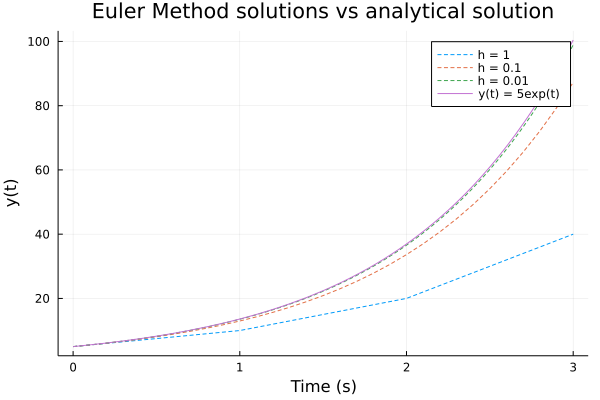

In [49]:
t = 3 #seconds 

h = 1
plot(collect(0:h:t),euler(h,t,5), label = "h = 1", linestyle = :dash)

h = 0.1
plot!(collect(0:h:t),euler(h,t,5), label = "h = 0.1",linestyle = :dash)

h = 0.01
plot!(collect(0:h:t),euler(h,t,5), label = "h = 0.01",linestyle = :dash)

plot!(y,0,t, label = "y(t) = 5exp(t)")

title!("Euler Method solutions vs analytical solution")
xlabel!("Time (s)")
ylabel!("y(t)")

In [59]:
function get_error(f1, f2, h, t)
    tspan = collect(0:h:t)
    f1_sol = f1.(tspan) #solve analytical solution for y at each t value
    f2_sol = f2(h,t,5)
    f1_sol - f2_sol #return cumulative truncation error for each time step 
end

get_error (generic function with 1 method)

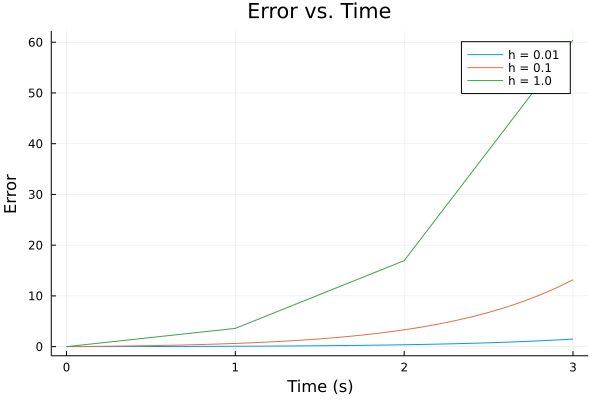

In [63]:
errorplot = plot(title = "Error vs. Time")
xlabel!("Time (s)")
ylabel!("Error")
for h in [0.01,0.1,1]
    plot!(collect(0:h:t),get_error(y,euler,h,t), label = "h = $(h)")
end
errorplot 

### 2) Deterministic vs Stochastic solutions on the predator-prey system

a)

In [64]:
function lotka_volterra!(dy,y,p,t)
    y1,y2 = y 
    k1,k2,k4 = p
    dy[1] = (k1*y1) - (k2*y1*y2)
    dy[2] = (k2*y1*y2) - (k4*y2)
end

lotka_volterra! (generic function with 1 method)

b)

Equation 1 is first order
Equation 2 is second order
Equation 3 is first order 

c)

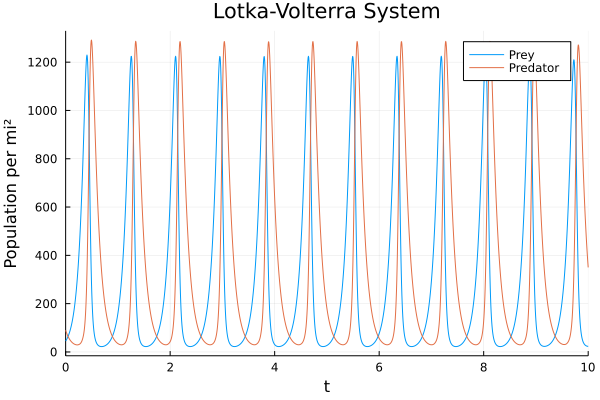

In [75]:
A = 4 #mi^2
y0 = [45, 90] # initial populations 
p = [10,0.03,9] # rate constsants 
tspan = (0.0,10.0) #10 seconds 

lk_prob = ODEProblem(lotka_volterra!,y0,tspan,p)
lk_sol = solve(lk_prob)

plot(lk_sol, label = ["Prey" "Predator"])
title!("Lotka-Volterra System")
ylabel!("Population per mi²")

┌ Info: Saved animation to 
│   fn = /Users/jonathanfischer/Desktop/Modeling the Living Cell/HW3/lotka_volterra.gif
└ @ Plots /Users/jonathanfischer/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/jonathanfischer/Desktop/Modeling the Living Cell/HW3/lotka_volterra.gif")
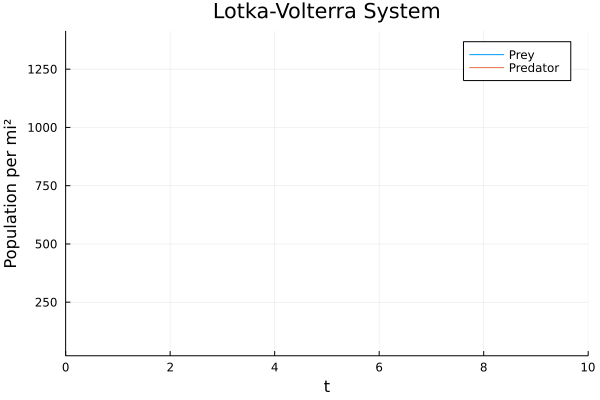

In [80]:
animate(lk_sol,"lotka_volterra.gif",every= 10,title = "Lotka-Volterra System",label = ["Prey" "Predator"], ylabel = "Population per mi²")

3) Gillespie Algorithm

a)

In [82]:
println("Y1: $(y0[1]*A) prey")
println("Y2: $(y0[2]*A) predators")

Y1: 180 prey
Y2: 360 predators


b)

In [87]:
println("c₁: $(p[1]) tu⁻¹")
println("c₂: $(p[2]/A) tu⁻¹")
println("c₃: $(p[3]) tu⁻¹")

c₁: 10.0 tu⁻¹
c₂: 0.0075 tu⁻¹
c₃: 9.0 tu⁻¹


c)

3 reactions: prey birth, predator feeding/reproduction, predator death

d) 

2 species, predator and prey

e)

f)

g)

In [90]:
function gillespie(model, y0, tend, c, stoich; tstart=zero(tend))
    t = tstart   # Current time
    ts = [t]     # Time points
    y = copy(y0) # Current state
    ys = copy(y) # Record of states
    while t < tend
        a = model(y, c, t)  # propensities of reactions
        # dts from all reactions
        dts = randexp(length(a)) ./ a
        # Choose the reaction 
        i = argmin(dts)
        dt = dts[i]
        dy = stoich[i]
        # Update state and time
        u .+= dy
        t += dt
        us = [ys y]  # Append state variable to record
        push!(ts, t) # Append time point to record
    end
    # Make column as variables, rows as observations
    ys = collect(ys')
    return (t = ts, y = ys)
end

gillespie (generic function with 1 method)

In [89]:
"Propensity model for this reaction"
model(y, c, t) = [c.k1 * y[1],  c.k2 * y[1] * y[2], c.k4 * y[2]]

parameters = (k1=10.0, k2=0.0075, k4 = 9.0, stoich=[[2, 1], [-1, 2], [1, -1]])
u0 = [200, 0]
tend = 10.0

10.0

In [ ]:
sol2 = gillespie(model, u0, tend, parameters, parameters.stoich)

h)